In [ ]:
# load data

# split data into training/test sets

# build the network architecture

# compile the network

# train network

In [6]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 239.4 MB 2.5 MB/s eta 0:00:01    |████████                        | 59.1 MB 884 kB/s eta 0:03:24     |████████████████▊               | 125.3 MB 582 kB/s eta 0:03:16     |████████████████████████████▌   | 213.5 MB 93 kB/s eta 0:04:39     |█████████████████████████████▋  | 221.3 MB 125 kB/s eta 0:02:24
     |████████████████████████████████| 57 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 414 kB 886 kB/s eta 0:00:01
     |████████████████████████████████| 133 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 275 kB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 339 kB/s eta 0:00:01
     |████████████████████████████████| 71 kB 905 kB/s eta 0:00:011
     |████████████████████████████████| 396 kB 1.7 MB/s eta 0:00:01
     |██████████████████████████████

In [21]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [22]:
DATASET_PATH = "data.json"

In [ ]:
def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)

    # convert lists into numpy arrays
    X = np.array(data["mfcc"])
    Y = np.array(data["labels"])

    print("Data Loaded!")
    return X, Y



In [26]:
def plot_history(history):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="upper left")
    axs[0].set_title("Accuracy over Epochs")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="train loss")
    axs[1].plot(history.history["val_loss"], label="validation loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper left")
    axs[1].set_title("Loss over Epochs")

    plt.show()

Data Loaded!


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 512)            │       865,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,018,378 (3.88 MB)

 Trainable params: 1,018,378 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1174 - loss: 40.7258 - val_accuracy: 0.2403 - val_loss: 3.6813
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1264 - loss: 7.1714 - val_accuracy: 0.2066 - val_loss: 3.5347
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1387 - loss: 4.6407 - val_accuracy: 0.1649 - val_loss: 3.5462
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1363 - loss: 4.0402 - val_accuracy: 0.1412 - val_loss: 3.5580
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1390 - loss: 3.8076 - val_accuracy: 0.1455 - val_loss: 3.5447
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1513 - loss: 3.6598 - val_accuracy: 0.1859 - val_loss: 3.5083
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1648 - loss: 3.6322 - val_accuracy: 0.1819 - val_loss: 3.4683
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1684 - loss: 3.5459 - val_accuracy: 0

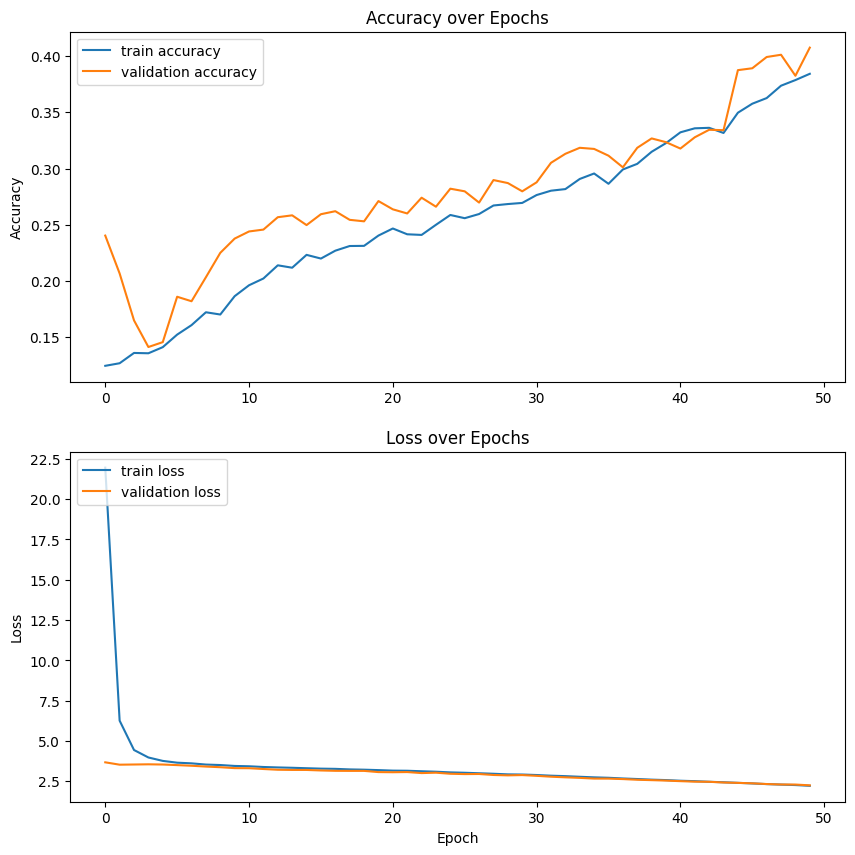

In [ ]:
if __name__ == "__main__":

    # load data
    inputs, targets = load_data("data.json")  # Make sure DATASET_PATH is defined or replace it with the actual path

    # split data
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, 
                                                                              targets, 
                                                                              test_size=0.3)

    # model architecture
    model = keras.Sequential([
        # input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

        # 1st hidden layer
        keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 2nd hidden layer
        keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),


        # 3rd hidden layer
        keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 4th hidden layer
        keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),


        # output layer
        keras.layers.Dense(10, activation="softmax")  # Corrected typo here
    ])
    
    # compile the model
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    # summary of the model
    model.summary()

    # training
    history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=50, batch_size=32)

    # plot accuracy and error over the epochs
    plot_history(history)